# **Predict Employee Attrition**
---

# Import Library

In [8]:
# Data manipulation
import numpy as np
import pandas as pd
import datetime as dt

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Read Data

In [10]:
# Read data
link = 'https://raw.githubusercontent.com/sabirinID/Predicting-Employee-Attrition/main/Dataset/hr_employee_retention_dataset.csv'
df = pd.read_csv(link, index_col=0)

In [11]:
df.sample(5)

,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
Username,,,,,,,,,,,,,,,,,,,,,,,,
madSardines6,106459,Belum_menikah,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,2,3.0,0.0,4.0,16.0,+6281393313xxx,madSardines6012@yahoo.com,Sarjana,1,NaN,NaN,1985-01-07,2011-01-10,2017-04-05,-
sincereBass4,101615,Bercerai,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Biasa,Jakarta Pusat,Website,2,2.0,0.0,3.0,5.0,+6285679942xxx,sincereBass4134@yahoo.com,Sarjana,1,NaN,NaN,1974-05-09,2014-05-12,2020-1-17,-
brainyMagpie7,106620,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Senior_level,Biasa,Jakarta Pusat,Indeed,2,5.0,5.0,0.0,9.0,+6281267984xxx,brainyMagpie7048@gmail.com,Doktor,1,NaN,internal_conflict,1986-09-01,2014-9-29,2020-1-18,2019-06-06
lovesickRhino0,105734,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,LinkedIn,1,3.0,6.0,3.0,2.0,+6287885203xxx,lovesickRhino0235@hotmail.com,Sarjana,1,NaN,tidak_bahagia,1987-06-18,2015-3-30,2020-02-04,2015-04-01
pridefulChamois9,101005,Menikah,Wanita,Outsource,Software Engineer (Back End),Senior_level,Biasa,Jakarta Selatan,LinkedIn,3,3.0,0.0,0.0,1.0,+6281276322xxx,pridefulChamois9218@proton.com,Sarjana,1,NaN,NaN,1969-09-08,2014-07-07,2020-01-11,-


# Data Understanding

## Features Definition

| Nama Fitur                         | Deskripsi Fitur                                 |
|------------------------------------|-------------------------------------------------|
| EnterpriseID                       | Nomor induk karyawan                            |
| StatusPernikahan                   | Status pernikahan karyawan                      |
| JenisKelamin                       | Jenis kelamin karyawan                          |
| StatusKepegawaian                  | Status kepegawaian karyawan                     |
| Pekerjaan                          | Posisi pekerjaan karyawan                       |
| JenjangKarir                       | Tingkat karir karyawan                          |
| PerformancePegawai                 | Nilai kinerja karyawan                          |
| AsalDaerah                         | Asal daerah karyawan                            |
| HiringPlatform                     | Platform yang digunakan untuk merekrut karyawan |
| SkorSurveyEngagement               | Skor survei keterlibatan karyawan               |
| SkorKepuasanPegawai                | Skor kepuasan karyawan                          |
| JumlahKeikutsertaanProjek          | Jumlah proyek yang diikuti oleh karyawan        |
| JumlahKeterlambatanSebulanTerakhir | Jumlah keterlambatan bulanan terbaru karyawan   |
| JumlahKetidakhadiran               | Jumlah ketidakhadiran karyawan                  |
| NomorHP                            | Nomor ponsel karyawan                           |
| Email                              | Alamat email karyawan                           |
| TingkatPendidikan                  | Tingkat pendidikan karyawan                     |
| PernahBekerja                      | Pengalaman kerja karyawan                       |
| IkutProgramLOP                     | Partisipasi dalam program LOP                   |
| AlasanResign                       | Alasan pengunduran diri karyawan                |
| TanggalLahir                       | Tanggal lahir karyawan                          |
| TanggalHiring                      | Tanggal perekrutan karyawan                     |
| TanggalPenilaianKaryawan           | Tanggal penilaian kinerja karyawan              |
| TanggalResign                      | Tanggal pengunduran diri karyawan               |

## Dimensions of the DataFrame

In [12]:
df.shape

(287, 24)

In [13]:
print('Dataset ini memiliki dimensi data, yaitu')
print('Jumlah baris: {}'.format(df.shape[0]))
print('Jumlah kolom: {}'.format(df.shape[1]))

Dataset ini memiliki dimensi data, yaitu
Jumlah baris: 287
Jumlah kolom: 24


## Data Types of the Features

In [14]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, spiritedPorpoise3 to puzzledFish5
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   EnterpriseID                        287 non-null    int64  
 1   StatusPernikahan                    287 non-null    object 
 2   JenisKelamin                        287 non-null    object 
 3   StatusKepegawaian                   287 non-null    object 
 4   Pekerjaan                           287 non-null    object 
 5   JenjangKarir                        287 non-null    object 
 6   PerformancePegawai                  287 non-null    object 
 7   AsalDaerah                          287 non-null    object 
 8   HiringPlatform                      287 non-null    object 
 9   SkorSurveyEngagement                287 non-null    int64  
 10  SkorKepuasanPegawai                 282 non-null    float64
 11  JumlahKeikutsertaanProjek

🔎 Observasi
- Tipe data: float64, int64, dan object.
- Fitur `EnterpriseID` hanya berisi identifikasi unik untuk setiap karyawan tanpa memberikan informasi tambahan yang relevan untuk analisis, sehingga dapat dihapus.

# Data Exploration

## Exploratory Data Analysis

### Statistical Analysis

In [15]:
# Statistics for the columns (features)
df.describe(include='all')

,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
count,287.000000,287,287,287,287,287,287,287,287,287.000000,282.000000,284.000000,286.000000,281.000000,287,287,287,287,29.000000,221,287,287,287,287
unique,NaN,5,2,3,14,3,5,5,9,NaN,NaN,NaN,NaN,NaN,287,287,3,2,NaN,11,284,97,127,53
top,NaN,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,NaN,NaN,NaN,NaN,NaN,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Sarjana,1,NaN,masih_bekerja,1987-06-14,2011-01-10,2020-1-14,-
freq,NaN,132,167,217,109,169,85,72,85,NaN,NaN,NaN,NaN,NaN,1,1,176,286,NaN,132,2,12,17,198
mean,105923.324042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.101045,3.904255,1.179577,0.412587,10.448399,NaN,NaN,NaN,NaN,0.517241,NaN,NaN,NaN,NaN,NaN
std,4044.977599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.836388,0.913355,2.294441,1.275016,6.902252,NaN,NaN,NaN,NaN,0.508548,NaN,NaN,NaN,NaN,NaN
min,100282.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,101269.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,0.000000,0.000000,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,106069.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,4.000000,0.000000,0.000000,10.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
75%,110514.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,5.000000,0.000000,0.000000,15.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN


In [16]:
# Define features
num = df.select_dtypes(include=['float64', 'int64'])
cat = df.select_dtypes(include=['object'])

num_cols = num.columns
cat_cols = cat.columns

In [17]:
print(f'Jumlah fitur numerikal  : {num.shape[1]}')
print(f'Jumlah fitur kategorikal: {cat.shape[1]}')

Jumlah fitur numerikal  : 7
Jumlah fitur kategorikal: 17


### Univariate Analysis

#### Numerical Features

In [18]:
num.describe()

,EnterpriseID,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP
count,287.000000,287.000000,282.000000,284.000000,286.000000,281.000000,29.000000
mean,105923.324042,3.101045,3.904255,1.179577,0.412587,10.448399,0.517241
std,4044.977599,0.836388,0.913355,2.294441,1.275016,6.902252,0.508548
min,100282.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,101269.000000,3.000000,3.000000,0.000000,0.000000,5.000000,0.000000
50%,106069.000000,3.000000,4.000000,0.000000,0.000000,10.000000,1.000000
75%,110514.500000,4.000000,5.000000,0.000000,0.000000,15.000000,1.000000
max,111703.000000,5.000000,5.000000,8.000000,6.000000,55.000000,1.000000


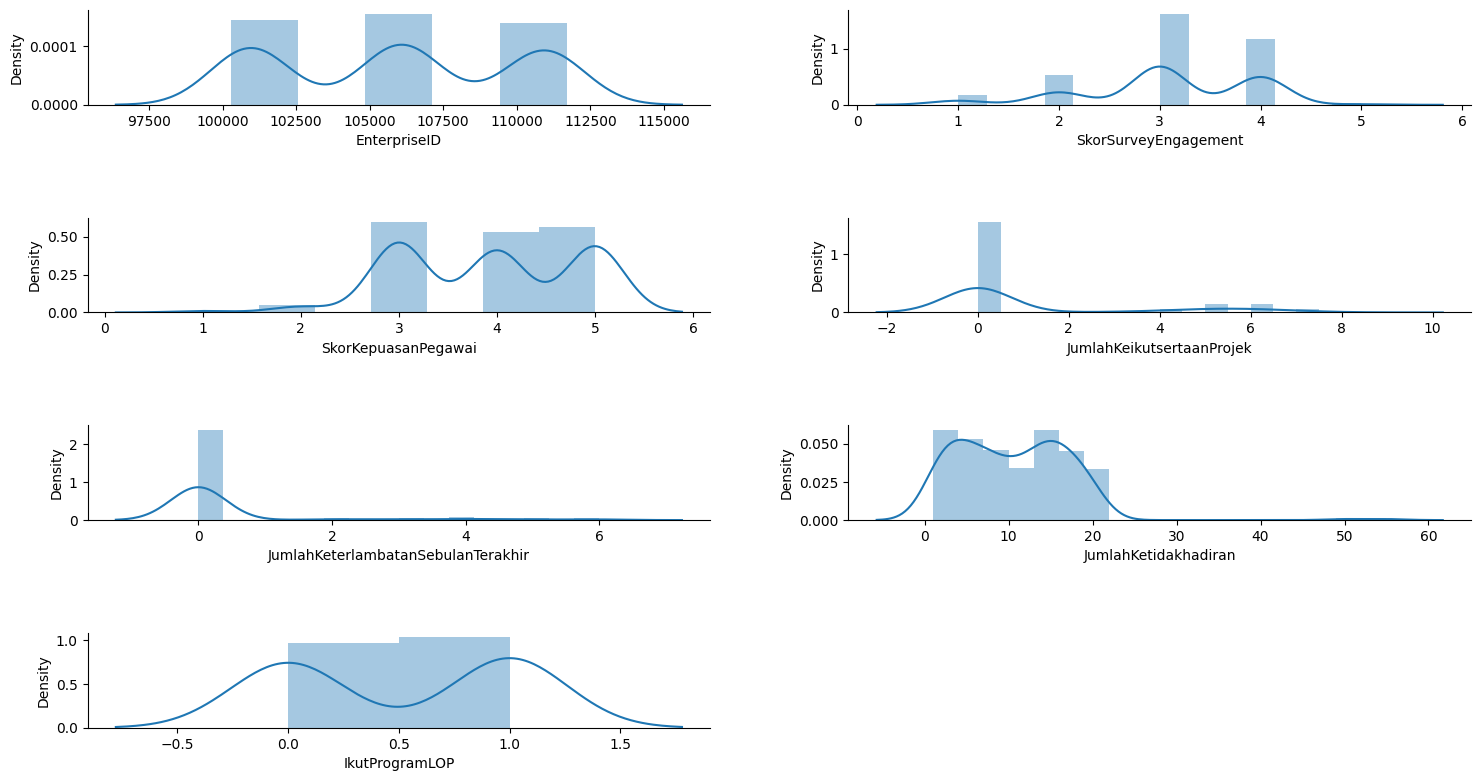

In [20]:
plt.figure(figsize=(16, 9))
for i in range(0, len(num_cols)):
    plt.subplot(4, 2, i+1)
    sns.distplot(df[num_cols[i]])
    sns.despine()
    plt.tight_layout(pad=5)

plt.show()

🔎 Insights
- XXX

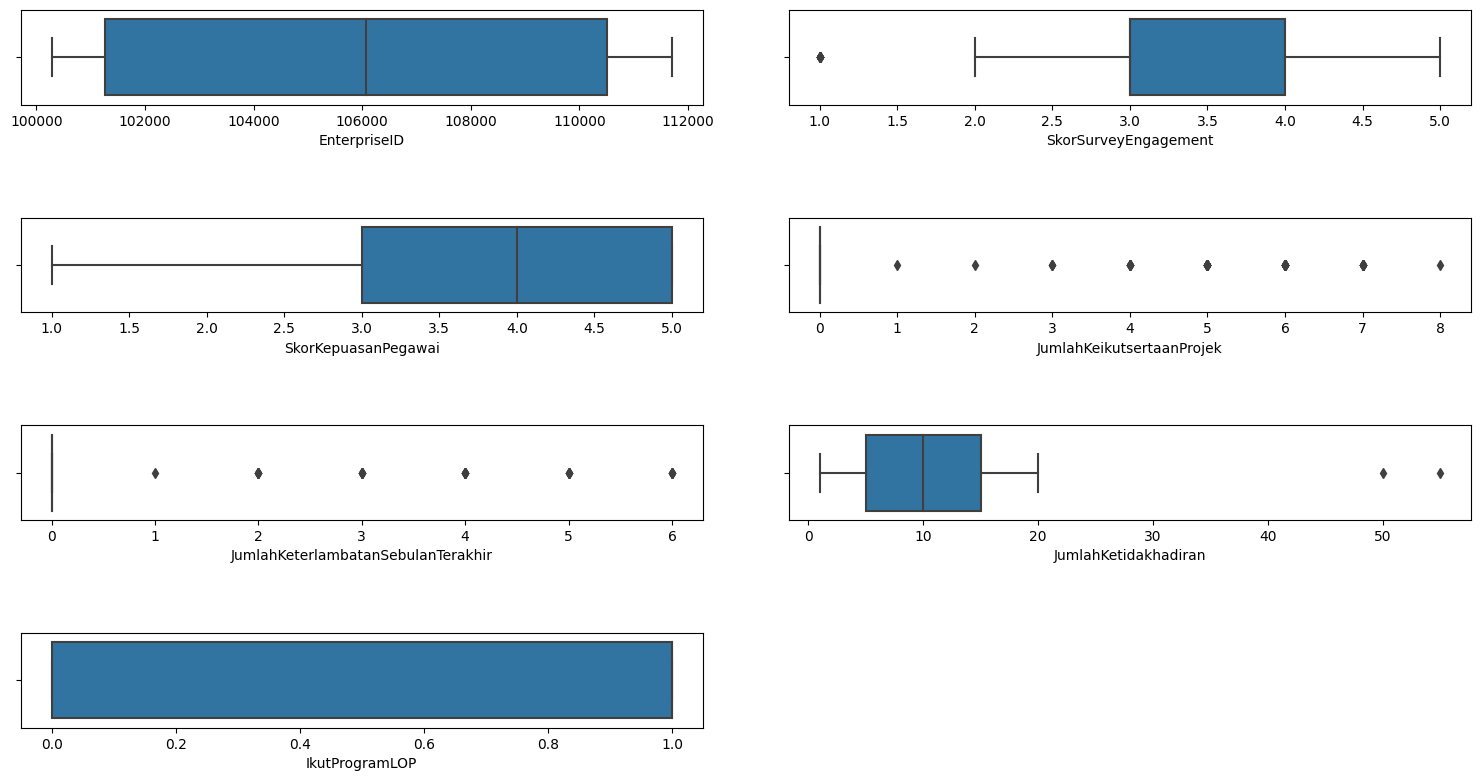

In [21]:
plt.figure(figsize=(16, 9))

for i in range(0, len(num_cols)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=df[num_cols[i]])
    plt.tight_layout(pad=5)

🔎 Insights
- XXX

#### Categorical Features

In [ ]:
cat.describe()

,Gender,ClickedAd,City,Province,AdCategory
count,997,1000,1000,1000,1000
unique,2,2,30,16,10
top,Perempuan,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,500,64,253,112


🔽 `Gender`

In [ ]:
df['Gender'].value_counts(normalize=True)

Gender
Perempuan    0.519559
Laki-Laki    0.480441
Name: proportion, dtype: float64